Populating the interactive namespace from numpy and matplotlib


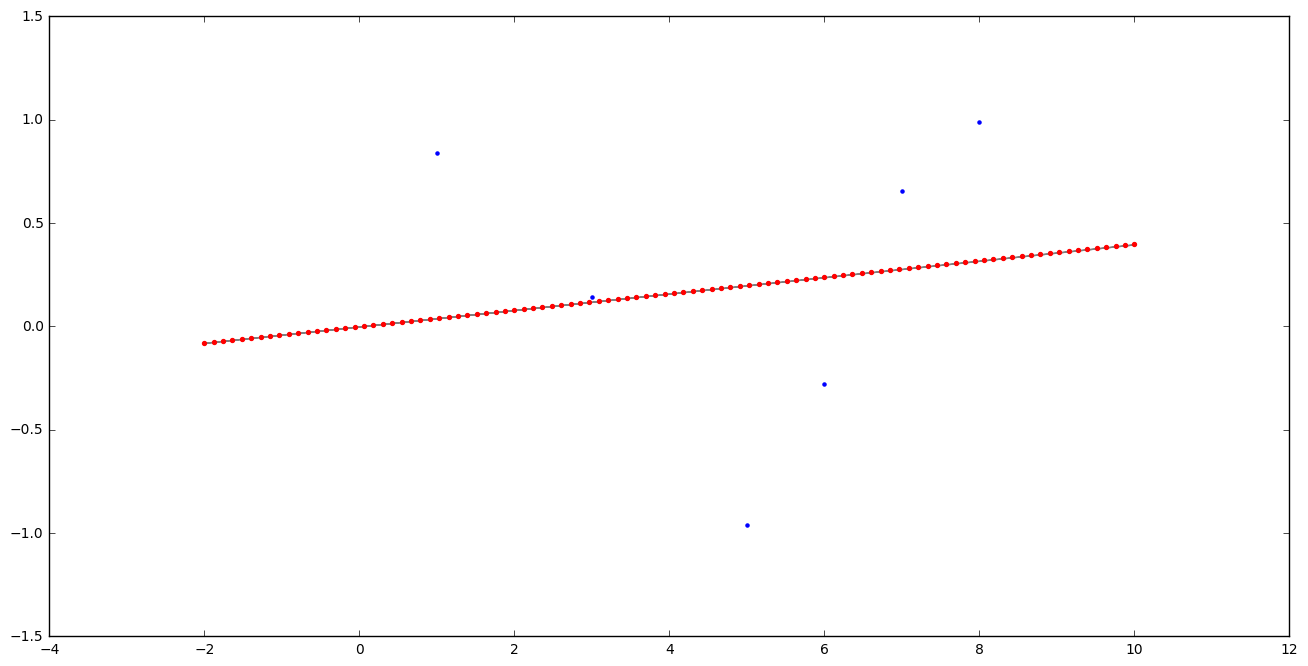

In [14]:
import scipy.io
import numpy 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

data_xvals = numpy.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )
data_yvals = numpy.sin( data_xvals )

#print numpy.dot(data_xvals.T,data_xvals)

#k is x*y

plt.scatter(data_xvals,data_yvals,5,color='blue')
plt.plot(data_xvals,data_yvals)


xTestAgainst = numpy.linspace(-2,10,100)

storeVals = []
storeB =[]
for x in xTestAgainst:
    A = x*data_xvals # xtest,x
    #print A
    B = numpy.linalg.pinv(numpy.dot(data_xvals.T,data_xvals)) # x,x
    #print B
    
    #print numpy.dot(A,B)
    C = data_yvals.T
    #print C
    
    D = numpy.dot(A,B)
    E = numpy.dot(D,C)
    storeVals.append(E)
    
    A1 = x*x
    B1 = x*data_xvals
    C1 = numpy.linalg.pinv(numpy.dot(data_xvals.T,data_xvals))
    D1 = (data_xvals*x).T
    
    E1 = numpy.dot(B1,C1)
    F1 = numpy.dot(E1,D1)
    storeB.append(A1 - F1)
    #print storeB
    
y1 = [(x+y)[0][0] for x,y in zip(storeVals,storeB)] 
y2 = [(x-y)[0][0] for x,y in zip(storeVals,storeB)]

#print y1

plt.fill_between(xTestAgainst,y1,y2, 
                   facecolor='yellow', alpha=0.5)
plt.scatter(xTestAgainst,storeVals,8,color='red')
#plt.plot(xTestAgainst,storeVals,color='red')
plt.show()
    
#[[k(a , b) for b in x] for a in x]





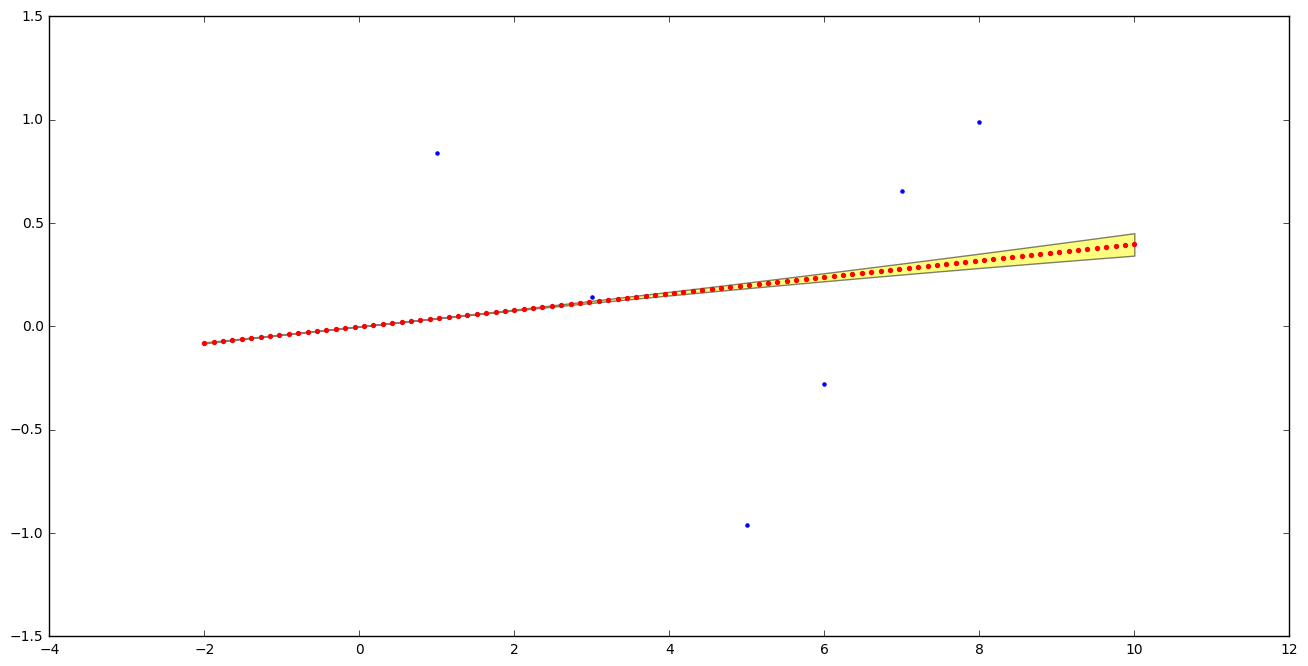

In [15]:
plt.scatter(data_xvals,data_yvals,5,color='blue')
plt.plot(data_xvals,data_yvals)
storeVals = []
storeB =[]
for x in xTestAgainst:
    A = x*data_xvals # xtest,x
    #print A
    B = numpy.dot(data_xvals.T,data_xvals)  # x,x
    #print B
    
    #print numpy.dot(A,B)
    C = data_yvals.T
    #print C
    bNoise = numpy.linalg.pinv(B + (numpy.identity(6)*.1))
    D = numpy.dot(A,bNoise)
    E = numpy.dot(D,C)
    storeVals.append(E)
    
    A1 = x*x
    B1 = x*data_xvals
    C1 = numpy.linalg.pinv(numpy.dot(data_xvals.T,data_xvals)+ (numpy.identity(6)*.1))
    D1 = (data_xvals*x).T
    
    E1 = numpy.dot(B1,C1)
    F1 = numpy.dot(E1,D1)
    storeB.append(A1 - F1)
    #print storeB
    
y1 = [(x+y)[0][0] for x,y in zip(storeVals,storeB)] 
y2 = [(x-y)[0][0] for x,y in zip(storeVals,storeB)]

#print y1

plt.fill_between(xTestAgainst,y1,y2, 
                   facecolor='yellow', alpha=0.5)
#print storeVals

plt.scatter(xTestAgainst,storeVals,8,color='red')
#plt.scatter(xTestAgainst,y1,8,color='green')
#plt.scatter(xTestAgainst,y1,8,color='green')
plt.show()

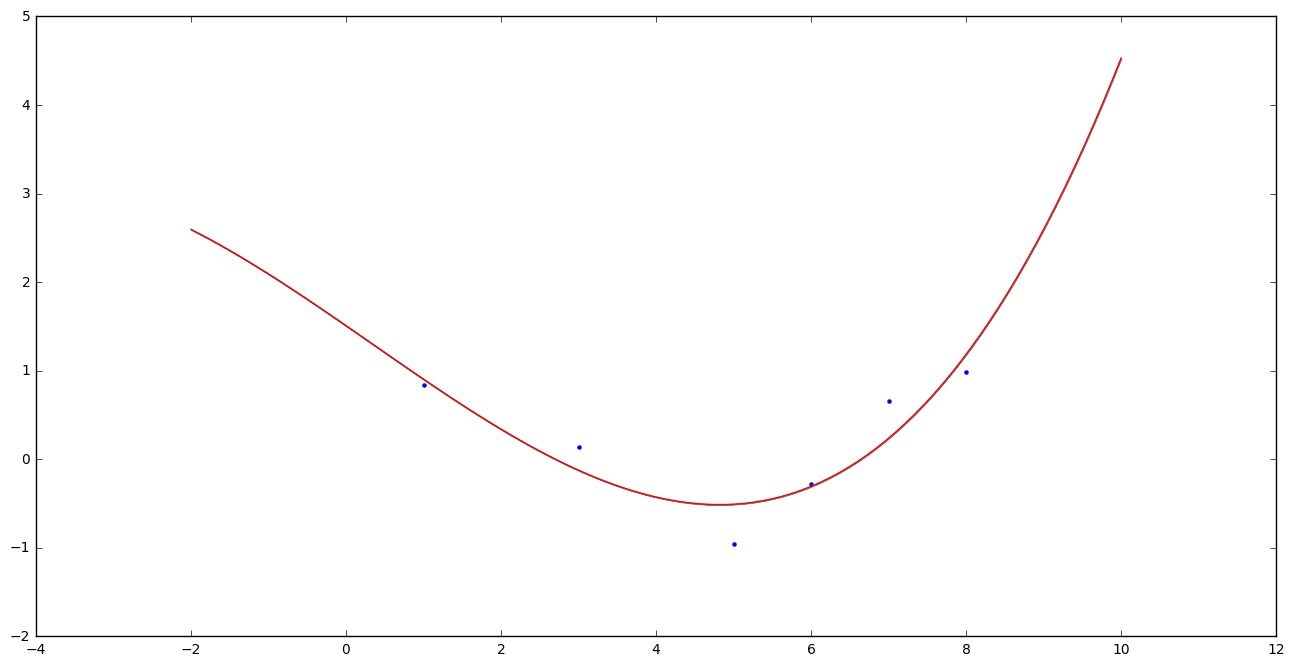

In [16]:
plt.scatter(data_xvals,data_yvals,5,color='blue')
storeVals = []
storeS = []
for x in xTestAgainst:
    A = numpy.power(1+x*data_xvals,3) # xtest,x
    B = numpy.linalg.pinv(numpy.power(1+numpy.dot(data_xvals.T,data_xvals),3)) # x,x
    C = data_yvals.T
    D = numpy.dot(A,B)
    E = numpy.dot(D,C)
    storeVals.append(E[0])
   
    A1 = numpy.power(1+x*x,3)
    B1 = numpy.power(1+x*data_xvals,3)
    C1 = numpy.linalg.pinv(numpy.power(1+numpy.dot(data_xvals.T,data_xvals),3))
    D1 = (numpy.power(1+data_xvals*x,3).T)
    
    E1 = numpy.dot(B1,C1)
    F1 = numpy.dot(E1,D1)
    G1 = A1 - F1
    storeS.append(G1[0])
    
y1 = [(x+y)[0] for x,y in zip(storeVals,storeS)] 
y2 = [(x-y)[0] for x,y in zip(storeVals,storeS)]

plt.fill_between(xTestAgainst,y1,y2,facecolor='yellow', alpha=0.5)    
    
plt.plot(xTestAgainst,storeVals,color='red')
plt.show()


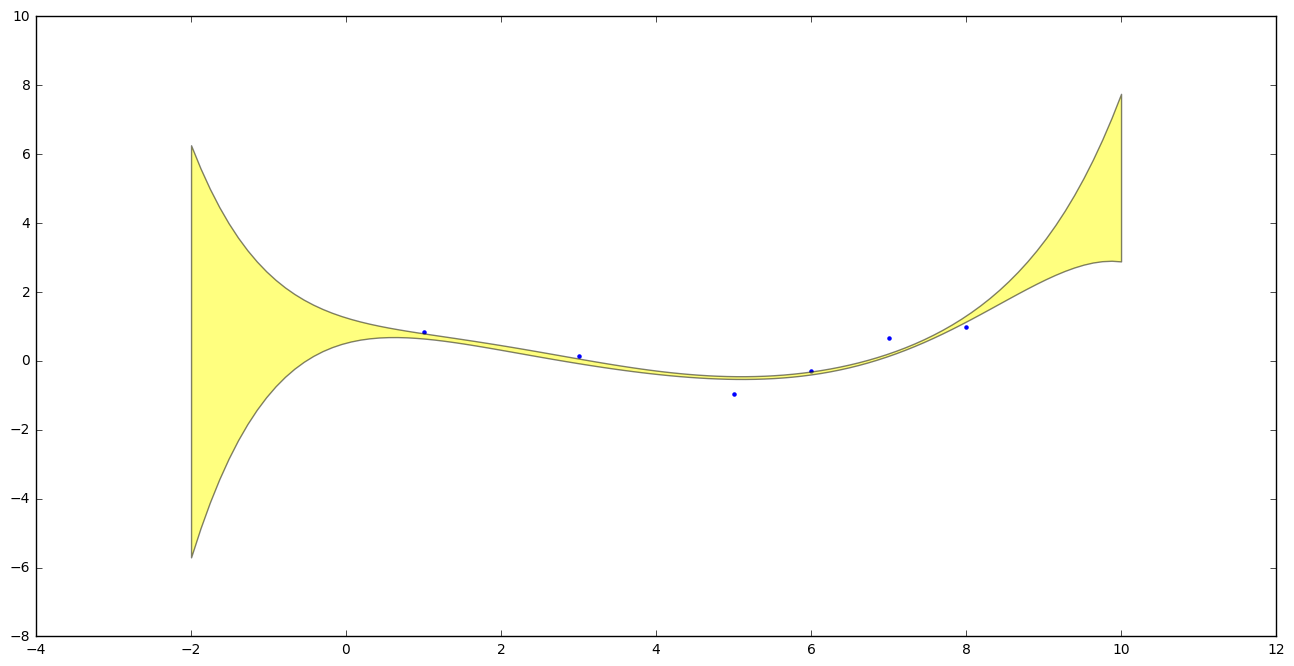

In [17]:
plt.scatter(data_xvals,data_yvals,5,color='blue')
storeNoise = []
storeS = []
for x in xTestAgainst:
    A = numpy.power(1+x*data_xvals,3) # xtest,x
    B = numpy.power(1+numpy.dot(data_xvals.T,data_xvals),3)# x,x
    C = data_yvals.T

    noisyB = numpy.linalg.pinv(B + (numpy.identity(6)*.1))
    D = numpy.dot(A,noisyB)
    E = numpy.dot(D,C)   
    storeNoise.append(E[0])
    
    A1 = numpy.power(1+x*x,3)
    B1 = numpy.power(1+x*data_xvals,3)
    C1 = numpy.linalg.pinv(numpy.power(1+numpy.dot(data_xvals.T,data_xvals),3) + (numpy.identity(6)*.1))
    D1 = (numpy.power(1+data_xvals*x,3).T)
    
    E1 = numpy.dot(B1,C1)
    F1 = numpy.dot(E1,D1)
    G1 = A1 - F1
    storeS.append(G1[0])   
    
y1 = [(x+y)[0] for x,y in zip(storeNoise,storeS)] 
y2 = [(x-y)[0] for x,y in zip(storeNoise,storeS)]


plt.fill_between(xTestAgainst,y1,y2, 
                   facecolor='yellow', alpha=0.5)  
    


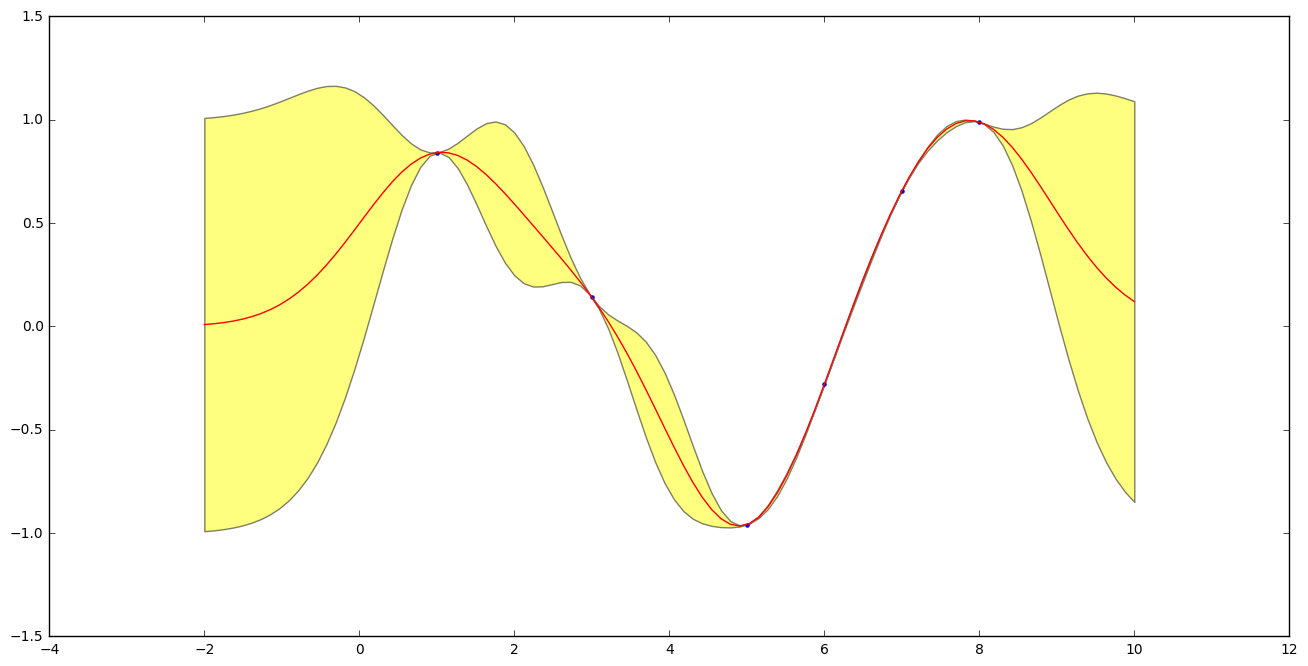

In [18]:
plt.scatter(data_xvals,data_yvals,5,color='blue')
storeVals = []
storeS = []
for x in xTestAgainst:
    A = numpy.exp((-.5)*numpy.power(x-data_xvals,2))
    B = numpy.linalg.pinv(numpy.exp((-.5)*numpy.power(data_xvals.T-data_xvals,2))) # x,x
    C = data_yvals.T
    D = numpy.dot(A,B)
    E = numpy.dot(D,C)
    storeVals.append(E[0])
   
    A1 = numpy.exp((-.5)*numpy.power(x-x,2))
    B1 = numpy.exp((-.5)*numpy.power(x-data_xvals,2))
    C1 = numpy.linalg.pinv(numpy.exp((-.5)*numpy.power(data_xvals.T-data_xvals,2)))
    D1 = numpy.exp((-.5)*numpy.power(data_xvals-x,2)).T
    
    E1 = numpy.dot(B1,C1)
    F1 = numpy.dot(E1,D1)
    G1 = A1 - F1
    storeS.append(G1[0])
    
y1 = [(x+y)[0] for x,y in zip(storeVals,storeS)] 
y2 = [(x-y)[0] for x,y in zip(storeVals,storeS)]

plt.fill_between(xTestAgainst,y1,y2,facecolor='yellow', alpha=0.5)    
    
plt.plot(xTestAgainst,storeVals,color='red')
plt.show()





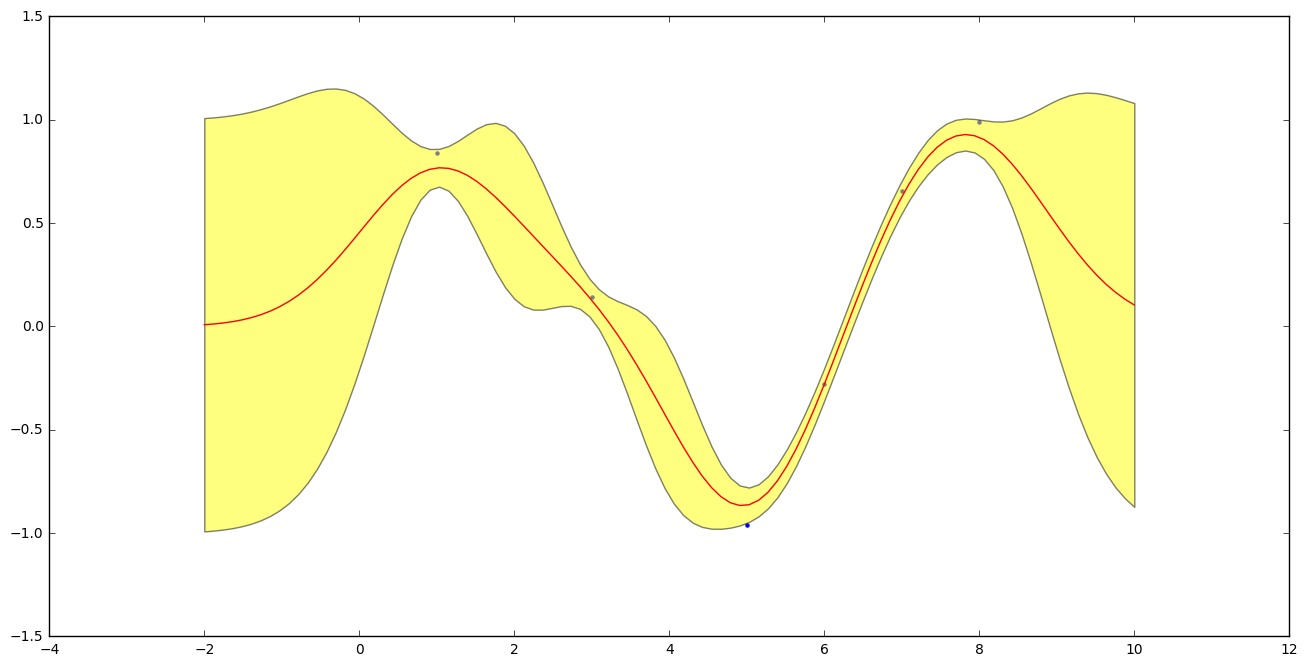

In [19]:
plt.scatter(data_xvals,data_yvals,5,color='blue')
storeVals = []
storeS = []
for x in xTestAgainst:
    A = numpy.exp((-.5)*numpy.power(x-data_xvals,2))
    B = numpy.linalg.pinv(numpy.exp((-.5)*numpy.power(data_xvals.T-data_xvals,2))+ (numpy.identity(6)*.1)) # x,x
    C = data_yvals.T
    D = numpy.dot(A,B)
    E = numpy.dot(D,C)
    storeVals.append(E[0])
   
    A1 = numpy.exp((-.5)*numpy.power(x-x,2))
    B1 = numpy.exp((-.5)*numpy.power(x-data_xvals,2))
    C1 = numpy.linalg.pinv(numpy.exp((-.5)*numpy.power(data_xvals.T-data_xvals,2))+ (numpy.identity(6)*.1))
    D1 = numpy.exp((-.5)*numpy.power(data_xvals-x,2)).T
    
    E1 = numpy.dot(B1,C1)
    F1 = numpy.dot(E1,D1)
    G1 = A1 - F1
    storeS.append(G1[0])
    
y1 = [(x+y)[0] for x,y in zip(storeVals,storeS)] 
y2 = [(x-y)[0] for x,y in zip(storeVals,storeS)]

plt.fill_between(xTestAgainst,y1,y2,facecolor='yellow', alpha=0.5)    
    
plt.plot(xTestAgainst,storeVals,color='red')
plt.show()



